In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
lcr_file = '/home/brad/Downloads/lcr.csv'
lcr_data = np.loadtxt(lcr_file, delimiter=',', skiprows = 1)
f = lcr_data[:, 0]
v = lcr_data[:, 1]

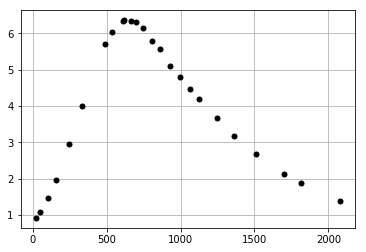

In [16]:
plt.figure()
plt.plot(f, v, 'k.', markersize=10)
plt.grid()

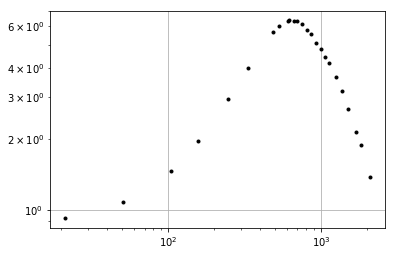

In [122]:
plt.loglog(f, v, 'k.')
plt.grid()

In [147]:
def Z_LC(L, C, R_L, R_C, f):
    omega = 2*np.pi*f
    ZL = 1j * omega * L + R_L
    ZC = 1./(1j*omega*C) + R_C
    
    ZLC = 1./ ( 1./ZL + 1./ ZC)
    return ZLC

def vdiv(ZLC, R1):
    
    a = np.abs(ZLC)
    b = np.abs(R1)
    return a / (a + b)


In [161]:
L = 8.9e-6
C = 6.4e-9
z = lambda x: Z_LC(L, C, 5, 17, x)

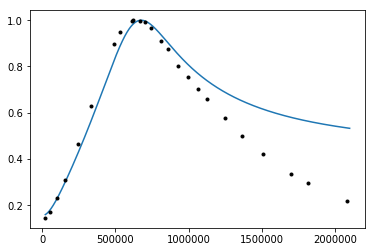

In [162]:
freqs = np.linspace(21e3, 2100e3, 1000)
vs = vdiv(z(freqs), 50)
plt.plot(freqs, vs / np.amax(vs))
plt.plot(f*1000, (v / np.amax(v)), 'k.')


In [62]:
vpred = lambda x, V, Rl, L: V*vdiv(Z_LC(L, C, Rl, x), 50)

In [99]:
error = lambda x: np.sum((vpred(f*1000, x[0], x[1], 9e-6) - v)**2)

In [86]:
error((11, 1))

449.8557493632317

In [104]:
from scipy.optimize import minimize
x = minimize(error, (6, 6, 1e-3), bounds = ((0, 100), (0, 10), (1e-10, 1e-2)))
print(x)

      fun: 4.849207392887441
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.32907052e-07, -1.83339477e-01,  0.00000000e+00])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([9.570891e+00, 1.000000e+01, 1.000000e-03])


In [105]:
res = x['x']

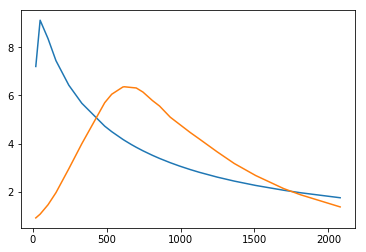

In [107]:
plt.plot(f, vpred(f*1000, res[0], res[1], res[2]))
plt.plot(f, v)